In [6]:
import pandas as pd

# 파일 경로
file_path = r'C:\Users\bluecom011\Desktop\최종본\최종데이터(한글) - 최종데이터(한글).csv'

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 데이터의 처음 몇 줄을 표시하여 내용 확인
data.head()


,자치구,경도,위도,장애인구수,평균 도로혼잡도,주차장,복지시설,과태료건수,부과액,평균차량빈도,장애인고용자수
0,강동구,127.153334,37.548510,18785,55.9,15517,51,2307,184200000,62.1,310
1,송파구,127.124191,37.497060,20571,52.8,22745,50,4656,409090000,52.1,764
2,강남구,127.075020,37.487902,15158,44.6,20566,56,6135,546904200,56.1,1211
3,서초구,127.039196,37.464048,10158,48.6,14690,30,3257,269840000,54.8,608
4,관악구,126.945904,37.464788,20228,48.6,20446,25,1776,152020000,40.2,235


In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [7]:
from scipy.stats import pearsonr
import numpy as np

# 상관계수와 p-value 계산을 위한 함수 정의
def calculate_correlation_and_pvalue(df, dependent_variable):
    results = {}
    for column in df.columns:
        if column != dependent_variable:
            correlation, pvalue = pearsonr(df[dependent_variable], df[column])
            results[column] = {'상관계수': correlation, 'p-value': pvalue}
    return results

# '과태료건수'를 종속 변수로 사용하여 상관계수와 p-value 계산
results = calculate_correlation_and_pvalue(data, '과태료건수')

results


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None

In [8]:
# 숫자 형식의 열만 선택
numeric_columns = data.select_dtypes(include=[np.number]).columns

# 문자열이나 다른 형식의 열을 제외한 후 다시 상관계수와 p-value 계산
numeric_results = calculate_correlation_and_pvalue(data[numeric_columns], '과태료건수')

numeric_results


{'경도': {'상관계수': 0.029887924794141506, 'p-value': 0.8872220640079427},
 '위도': {'상관계수': -0.2955340124375822, 'p-value': 0.1514902515885747},
 '장애인구수': {'상관계수': 0.27142453137369577, 'p-value': 0.189370789481898},
 '평균 도로혼잡도': {'상관계수': -0.18820543722706173, 'p-value': 0.36762087857088155},
 '주차장': {'상관계수': 0.37268495843222577, 'p-value': 0.06654062785148877},
 '복지시설': {'상관계수': 0.4779118593461699, 'p-value': 0.015681599818245958},
 '부과액': {'상관계수': 0.9954163624273914, 'p-value': 5.922372765367541e-25},
 '평균차량빈도': {'상관계수': -0.15540406815732327, 'p-value': 0.45823019761127265},
 '장애인고용자수': {'상관계수': 0.61909442900791, 'p-value': 0.0009681779268509612}}

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 선형회귀 모델을 위한 독립변수와 종속변수 준비
X = data[numeric_columns.drop('과태료건수')]
y = data['과태료건수']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

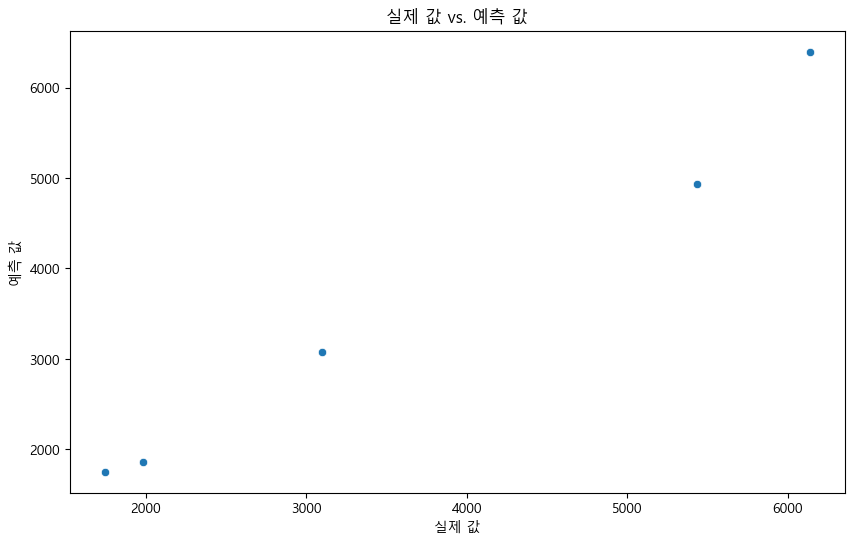

In [12]:
# 선형성 확인을 위한 산점도 (수정)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs. 예측 값')
plt.show()


In [ ]:
# 모델을 전체 데이터 세트에 대해 학습
model_full = LinearRegression()
model_full.fit(X, y)

# 전체 데이터 세트에 대한 예측 값
y_pred_full = model_full.predict(X)

# 전체 데이터 세트에 대한 잔차
residuals_full = y - y_pred_full

# 각 독립 변수에 대한 잔차의 산점도 그리기
plt.figure(figsize=(15, 12))

for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=X[col], y=residuals_full)
    plt.xlabel(col)
    plt.ylabel('잔차')
    plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


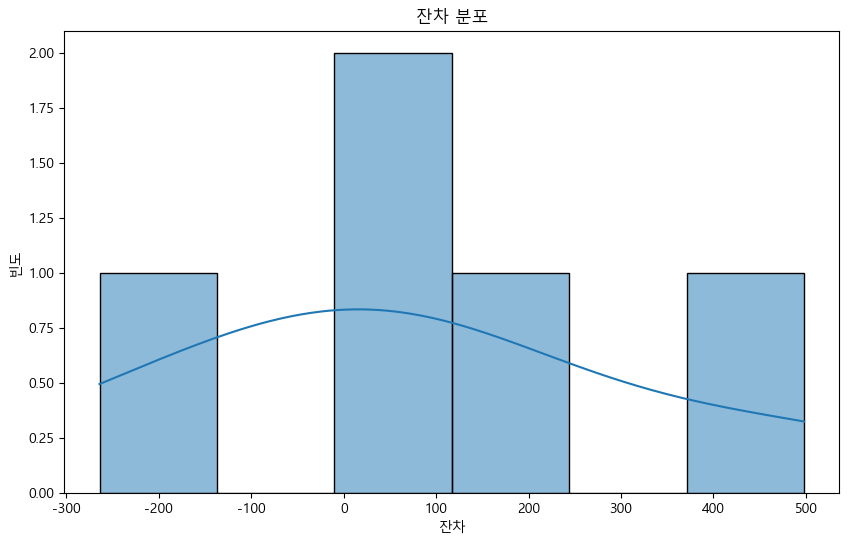

In [21]:

# 정규성 확인을 위한 잔차의 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.title('잔차 분포')
plt.show()

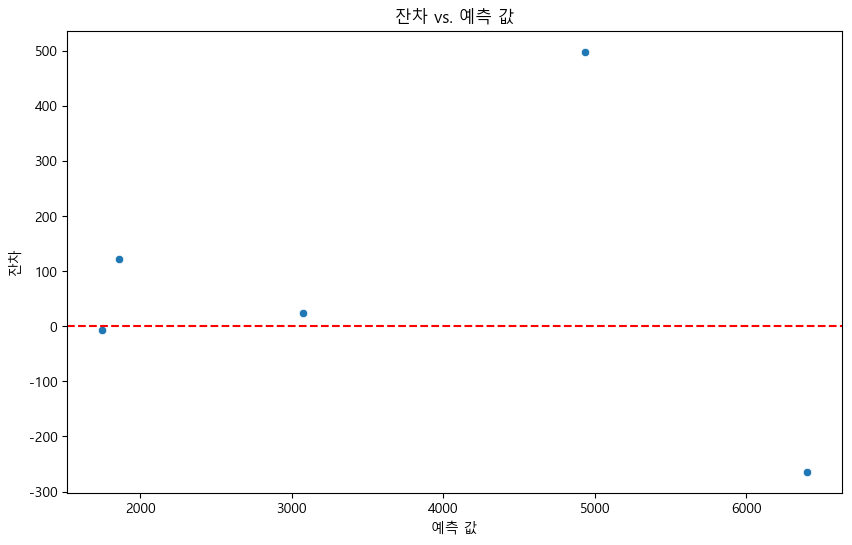

In [19]:
# 등분산성 확인을 위한 잔차의 산점도 (수정)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('예측 값')
plt.ylabel('잔차')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('잔차 vs. 예측 값')
plt.show()


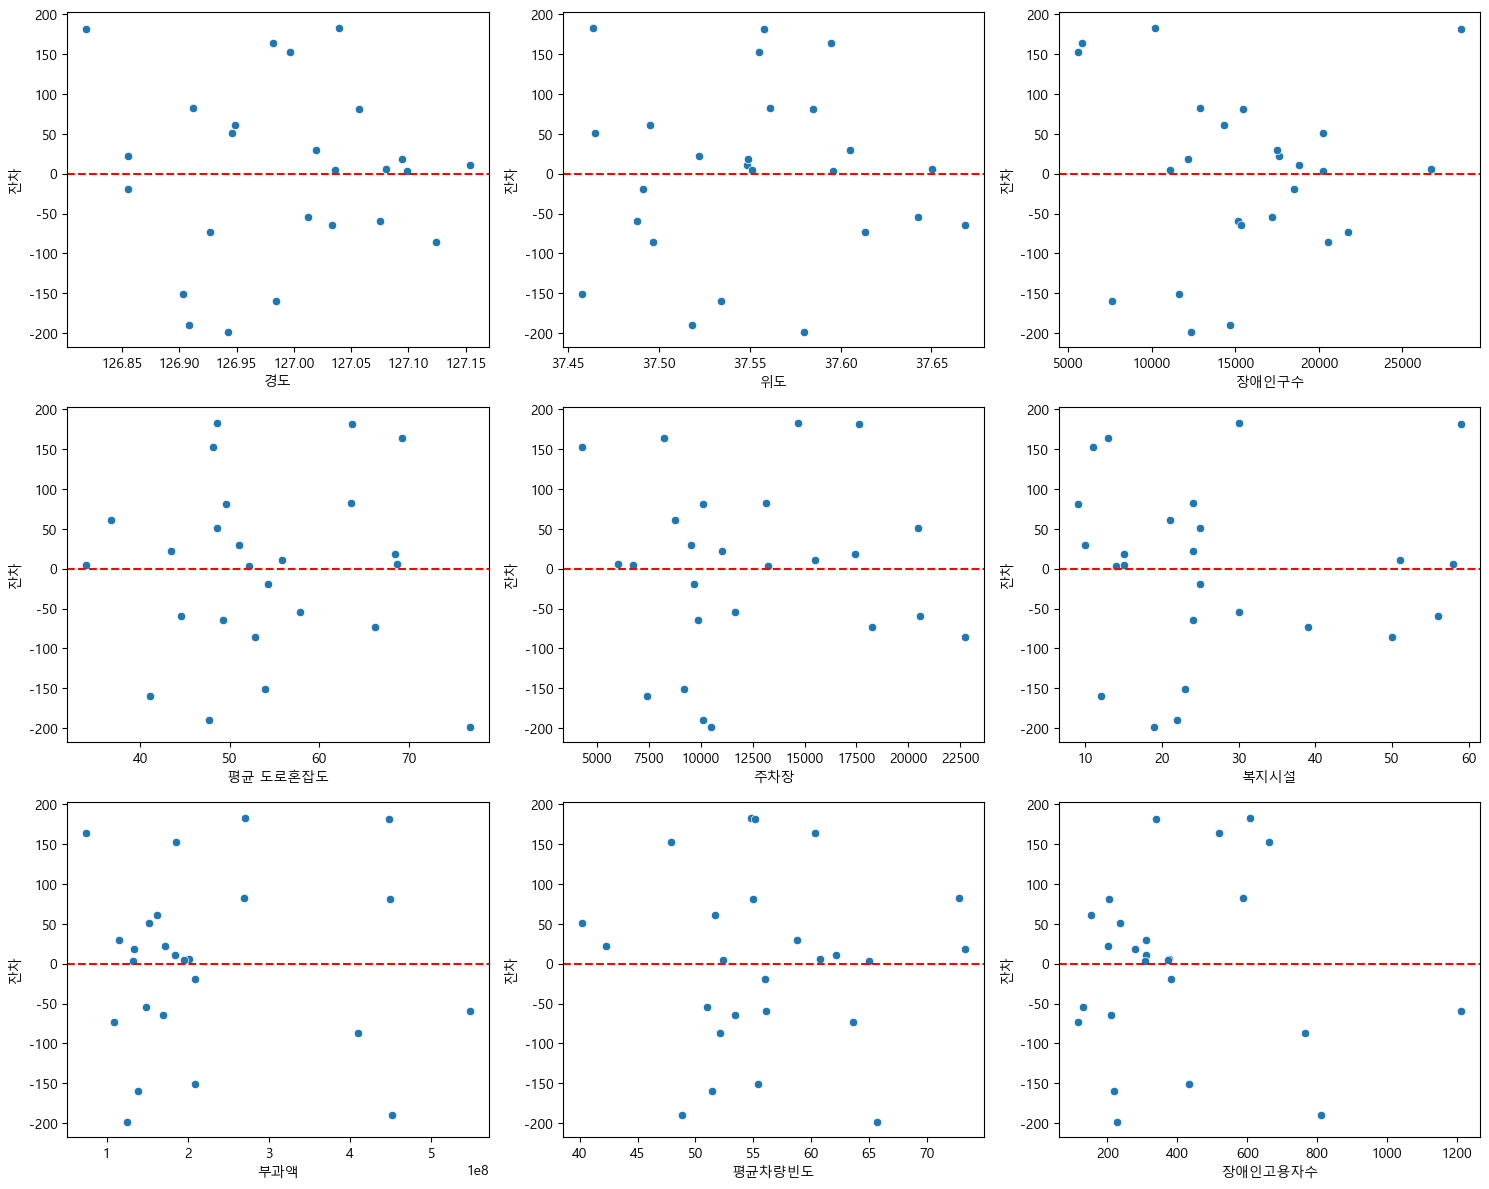

In [20]:
# 모델을 전체 데이터 세트에 대해 학습
model_full = LinearRegression()
model_full.fit(X, y)

# 전체 데이터 세트에 대한 예측 값
y_pred_full = model_full.predict(X)

# 전체 데이터 세트에 대한 잔차
residuals_full = y - y_pred_full

# 각 독립 변수에 대한 잔차의 산점도 그리기
plt.figure(figsize=(15, 12))

for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=X[col], y=residuals_full)
    plt.xlabel(col)
    plt.ylabel('잔차')
    plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


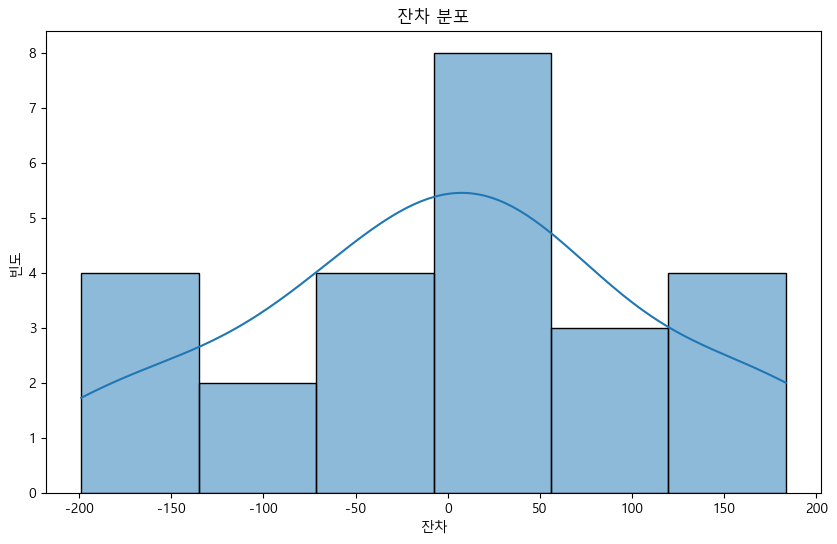

In [24]:
# 잔차의 정규성 확인을 위한 잔차의 히스토그램 재생성
plt.figure(figsize=(10, 6))
sns.histplot(residuals_full, kde=True)
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.title('잔차 분포')
plt.show()


In [22]:




# 다중공선성 확인을 위한 VIF 계산
VIF_data = pd.DataFrame()
VIF_data["feature"] = X.columns
VIF_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

VIF_data



,feature,VIF
0,경도,991429.013111
1,위도,996081.847581
2,장애인구수,31.873252
3,평균 도로혼잡도,71.602289
4,주차장,16.190178
5,복지시설,12.953398
6,부과액,10.797645
7,평균차량빈도,98.089480
8,장애인고용자수,11.102179


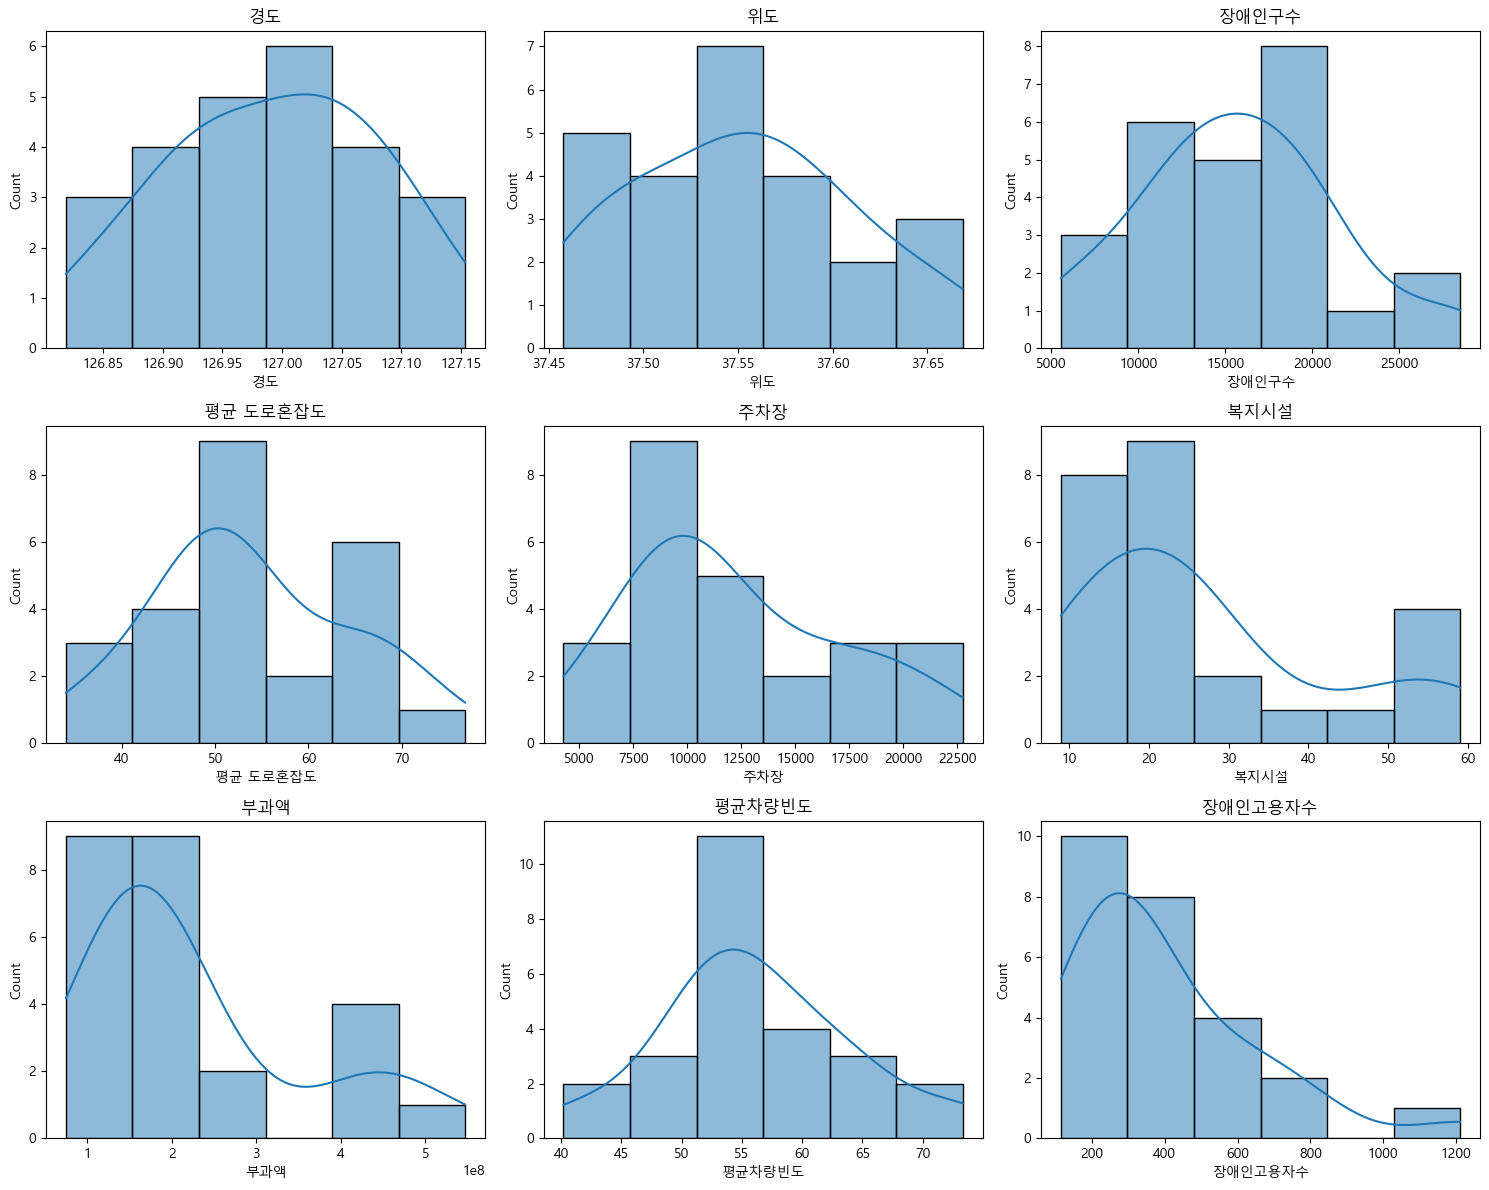

{'경도': 0.8899690508842468,
 '위도': 0.6165456771850586,
 '장애인구수': 0.827884316444397,
 '평균 도로혼잡도': 0.6065939664840698,
 '주차장': 0.17851795256137848,
 '복지시설': 0.0023978559765964746,
 '부과액': 0.00044560738024301827,
 '평균차량빈도': 0.6171720623970032,
 '장애인고용자수': 0.0021456333342939615}

In [23]:
from scipy.stats import shapiro

# 각 독립 변수에 대한 정규성 검정
shapiro_results = {}

plt.figure(figsize=(15, 12))

for i, col in enumerate(X.columns):
    # 히스토그램 그리기
    plt.subplot(3, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(col)

    # Shapiro-Wilk 검정 수행
    stat, p_value = shapiro(X[col])
    shapiro_results[col] = p_value

plt.tight_layout()
plt.show()

shapiro_results
